<a href="https://colab.research.google.com/github/JaiswalFelipe/deep-segmentation/blob/master/patch_maker.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install rasterio
!pip install patchify
!pip install imagecodecs
!pip install tifffile 
!pip install GDAL

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 19.3 MB 206 kB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 31.0 MB 1.5 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import os 
import cv2
import rasterio
import numpy as np
import tifffile as tiff
import imageio

from skimage import transform
from skimage import img_as_float
from matplotlib import pyplot as plt
from patchify import patchify, unpatchify
from PIL import Image
from rasterio.plot import show
from osgeo import gdal 

# Image patching with GDAL

In [ ]:
def image_patcher(input_file, output_folder, division):
  data = gdal.Open(input_file)

  gt = data.GetGeoTransform()
  #print(gt)

  xmin = gt[0]
  ymax = gt[3]
  res = gt[1]

  xlen = res * data.RasterXSize
  ylen = res * data.RasterYSize

  div = division

  xsize = xlen/div
  ysize = ylen/div

  xsteps = [xmin + xsize * i for i in range(div+1)]
  ysteps = [ymax - ysize * i for i in range(div+1)]

  for i in range(div):
    for j in range(div):
      xmin = xsteps[i]
      xmax = xsteps[i+1]
      ymax = ysteps[j]
      ymin = ysteps[j+1]

      #print("xmin: "+str(xmin))
      #print("xmax: "+str(xmax))
      #print("ymin: "+str(ymin))
      #print("ymax: "+str(ymax))
      #print("\n")

      gdal.Warp(output_folder + "patch" + str(i) + str(j) + ".tif",
                data, outputBounds = (xmin, ymin, xmax, ymax), dstNodata = -9999)

In [36]:
# Test run
image_patcher("/content/drive/MyDrive/Dissertation/ng_data/tile_1986_stack.tif","/content/drive/MyDrive/Dissertation/ng_data/training/image/tile_1986/",16)

# Visuals

- Number of bands in the image 23
- Labels and corresponding pixels in the mask:  [0 1] [206  44]


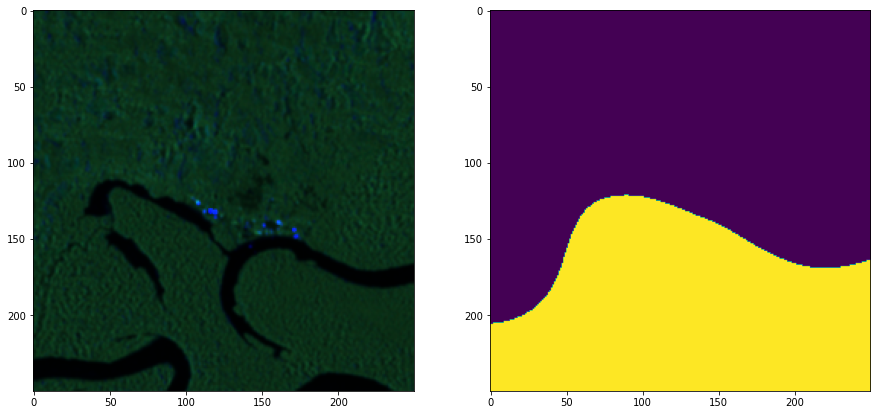

In [38]:
from matplotlib import rcParams

rcParams['figure.figsize'] = 15, 15

# Open image
patch_sample = gdal.Open("/content/drive/MyDrive/patch210.tif")

mask = imageio.imread("/content/drive/MyDrive/patch210 (1).tif").astype(int)
labels, count = np.unique(mask[:,0], return_counts = True)


# Check number of bands
print("- Number of bands in the image",patch_sample.RasterCount)
print("- Labels and corresponding pixels in the mask: ",labels, count)

# Get specific bands 
band1 = patch_sample.GetRasterBand(1).ReadAsArray()
band2 = patch_sample.GetRasterBand(2).ReadAsArray()
band3 = patch_sample.GetRasterBand(3).ReadAsArray()
band4 = patch_sample.GetRasterBand(4).ReadAsArray()
band5 = patch_sample.GetRasterBand(5).ReadAsArray()

# it can only show 4 channels, you can check combination of 4 channels
#img = np.dstack((band4,band5,band3)) # Near-IR, mid-IR, red = land-water boundaries
img = np.dstack((band3,band2,band1)) # flooded areas and vegetated areas
#img = np.dstack((band4,band5,band1)) # Vegetation

fig, ax = plt.subplots(1,2)
ax[0].imshow(img)
ax[1].imshow(mask)

In [40]:
p = img_as_float(imageio.imread("/content/drive/MyDrive/patch210.tif"))
print("image shape: ", p.shape)
print("mask shape: ", mask.shape)

image shape:  (250, 250, 23)
mask shape:  (250, 250)
